In [1]:
import csv
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
### Import data. Start with train data and validation data and labels respectively. 
### Test data and its labels will be examined later after models are generated.

df_valid = pd.read_csv('madelon_valid.data', sep=' ', header = None)
df_valid_labels = pd.read_csv('madelon_valid.labels', sep=' ', header = None)
df_train = pd.read_csv('madelon_train.data', sep=' ', header = None)
df_train_labels = pd.read_csv('madelon_train.labels', sep=' ', header = None)
df_test = pd.read_csv('madelon_test.data', sep=' ', header = None)


### header = None because the data does not contain column headers. 
### Drop 500th column of each data containing NaN values.
### You are predicting whether each of the relevant madelon data will produce either -1 or 1 

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [4]:
df_train_labels.head()

### Make sure column names are different

,0
0,-1
1,-1
2,-1
3,1
4,1


### Replace column 500 with NaNs with Train Label values containing 1's and -1's (target)

In [5]:
display(df_train.shape)
display(df_train_labels.shape)

(2000, 501)

(2000, 1)

In [6]:
df_train[500] = df_train_labels[0].values

In [35]:
df_train['target'] = df_train[500] 

In [37]:
del df_train[500]

In [38]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


### Where is the data provided by instructors?

In [39]:
### How many rows of df_valid, df_valid_labels, df_train, df_train_labels?

print(len(df_valid))
print(len(df_valid_labels))
print(len(df_train))
print(len(df_train_labels))

600
600
2000
2000


In [40]:
### EDA the data
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [41]:
df_train.sample()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
752,495,463,511,479,601,485,529,478,463,468,...,483,463,356,516,553,481,471,531,487,1


### Do we need to set index? 

In [42]:
df_train.isnull().sum().any()

False

In [43]:
type(df_train)

pandas.core.frame.DataFrame

In [13]:
!conda install psycopg2 --yes

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
psycopg2                  2.7.3.2                  py36_0    conda-forge


In [14]:
import psycopg2 as pg2
from psycopg2.extras import RealDictCursor

In [15]:
con = pg2.connect(host='34.211.227.227',
                  dbname='postgres',
                  user='postgres')
cur = con.cursor(cursor_factory=RealDictCursor)
cur.execute('SELECT * FROM madelon LIMIT 2000;')
results = cur.fetchall()
con.close()

#*If w/ lessons, memory issues likely. Create new t2 micro and pair ssh key from that new aws 
# clone to new AWS after keypair + launch jupyter notebook using docker (refer to wiki )

In [16]:
df1 = pd.DataFrame(results)

In [17]:
df1.isnull().sum().any()

False

In [20]:
df1.head()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
0,113536,1.769990,-1.662161,0.535499,-0.775455,-0.266000,-1.171712,-0.830730,-0.702224,1.701939,...,0.546834,-0.955396,-3.298431,0.630198,-0.163020,-0.453814,0.457963,-0.695673,-0.908571,1
1,113537,0.424074,-1.149286,2.324944,0.893158,0.966929,0.264760,0.058120,0.138753,-0.538529,...,0.474154,-0.490711,0.281688,0.319715,0.353108,0.703501,0.273817,-0.050529,0.352077,1
2,113538,0.039702,-0.422908,-0.757333,-1.737656,-0.196354,0.284116,-1.199733,0.138780,1.287985,...,2.070534,-1.612969,0.758138,0.865470,0.852963,1.865875,0.992801,0.537088,-0.864038,1
3,113539,-0.908020,2.350266,-0.214896,0.526067,-1.110966,-0.890008,-2.340148,1.330441,-0.537318,...,-1.984399,-0.253383,1.302887,-0.139092,-0.949291,1.465839,1.826189,1.306735,-0.622510,1
4,113540,-0.276299,-0.731486,0.283940,1.417463,-0.278125,0.232436,0.945643,-1.016760,0.097431,...,0.007944,0.360909,-1.024601,-0.601699,-0.335891,-0.109080,-0.208445,-1.925320,-0.199273,0


In [21]:
df1.shape

(2000, 1002)

In [22]:
len(df1)

2000

### No NaN's

In [23]:
import random

### Create random subsets of data: 3X10% of UCI and 3X10% of Josh's.

In [44]:
df_1 = df_train.sample(frac=0.1)
df_2 = df_train.sample(frac=0.1)
df_3 = df_train.sample(frac=0.1)

In [27]:
df_4 = df1.sample(frac=0.25)
df_5 = df1.sample(frac=0.25)
df_6 = df1.sample(frac=0.25)

## redundant - customize query to obtain random data. ORDER BY RANDOM 

In [45]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
1408,485,449,500,493,540,478,420,477,485,490,...,480,476,312,462,554,479,498,469,450,1
1941,481,525,450,476,468,466,500,476,483,472,...,478,504,720,488,421,481,477,527,505,1
805,491,525,507,468,449,483,472,475,467,481,...,475,456,399,467,496,482,468,541,476,1
946,477,445,499,497,434,475,481,478,500,482,...,477,482,788,488,479,475,495,501,474,1
1921,487,468,534,469,494,482,455,476,525,481,...,476,496,695,504,530,481,496,507,474,-1


In [46]:
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
78,485,448,422,476,464,474,488,477,488,478,...,475,471,752,466,459,471,477,526,477,1
1191,478,510,505,494,524,475,504,475,479,474,...,486,512,530,470,531,478,488,484,560,-1
1844,477,476,524,471,426,475,495,476,467,483,...,483,516,447,483,511,474,489,445,491,-1
364,477,443,572,491,503,466,451,477,478,479,...,481,506,563,456,483,475,477,505,500,-1
24,488,425,465,483,571,482,436,478,478,486,...,480,506,596,463,486,478,510,472,508,-1


In [47]:
df_4.head()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
739,114275,-0.115360,1.380891,-1.299829,1.074152,-0.430636,-0.634367,1.651083,-0.861300,-2.437934,...,0.308428,1.019987,-1.308302,-0.603905,1.311533,0.173294,-1.189006,-1.270849,0.378422,1
1662,115198,0.535909,0.309966,0.226546,1.641404,-1.063385,2.129474,0.584032,-0.709142,0.009167,...,0.497539,0.392035,-0.347495,1.235334,0.001262,-1.141508,0.416386,1.160136,0.187923,1
1353,114889,-0.386186,-0.237944,-0.323373,-1.149853,0.959422,0.810308,-0.916427,0.160386,1.231105,...,0.529053,-1.557138,1.504855,-1.507629,0.332014,0.409281,-0.274563,2.114131,1.665581,0
670,114206,0.109390,-1.468987,-0.918714,-1.780726,0.613604,0.326021,1.376443,-1.108151,-0.735903,...,-0.436319,-0.383205,0.013608,-0.067140,-0.790385,-1.033213,-0.044837,2.199936,0.115687,0
1260,114796,0.452897,0.921844,-0.976095,-0.627328,-0.245339,0.441762,-0.132682,-0.270198,0.713122,...,-1.952047,0.905337,0.116882,-0.394551,-1.326557,-0.198431,1.110046,-0.591225,0.320303,1


### How to visualize data based on types of data?  Any 'complete' reference?


In [70]:
import matplotlib

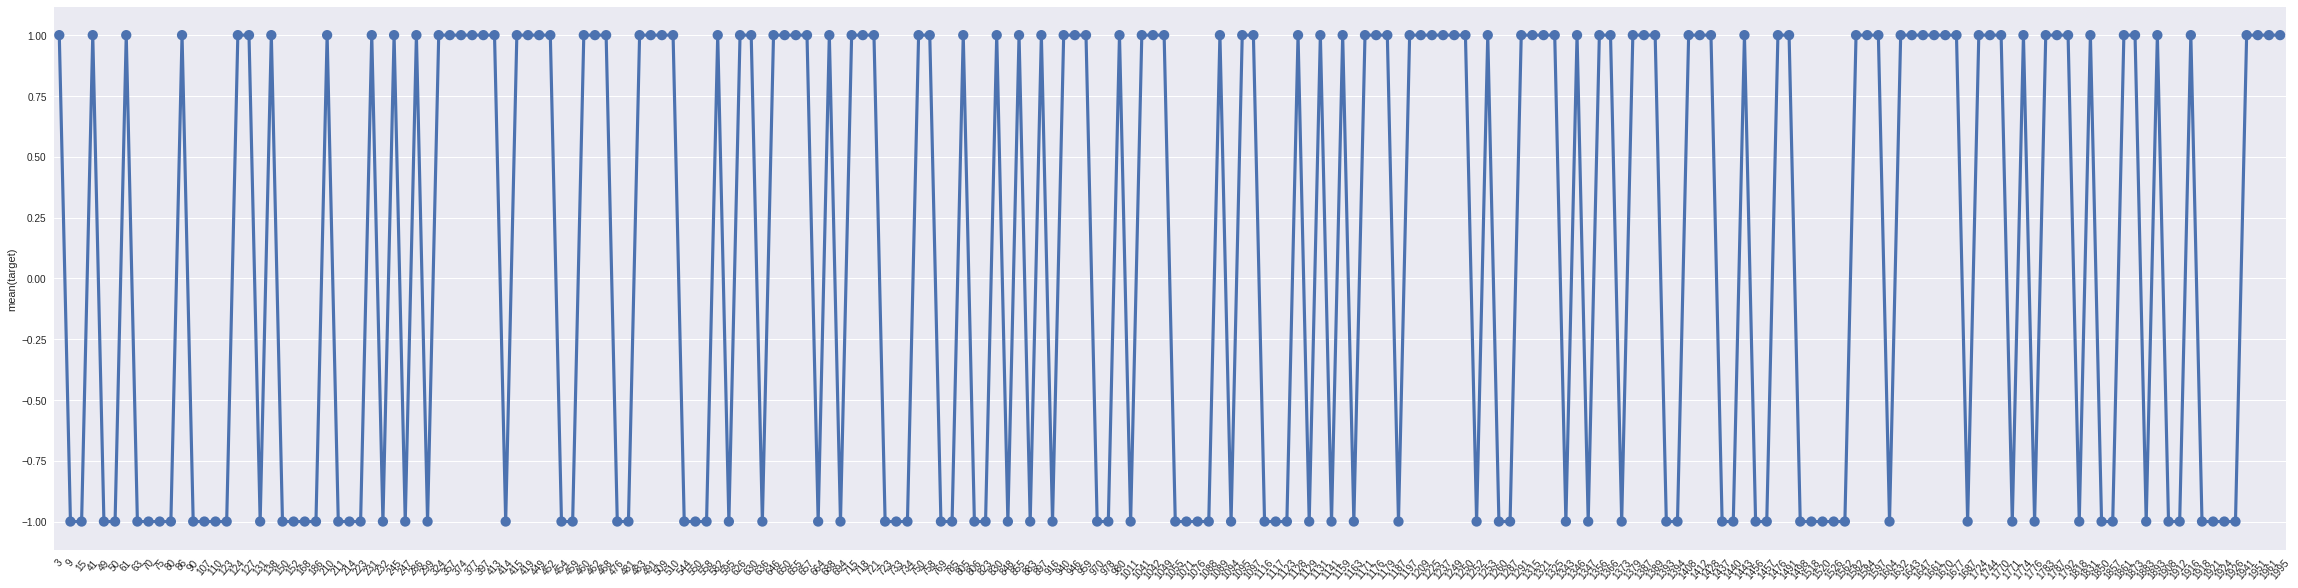

In [83]:
plt.figure(figsize=(40,10))
sns.pointplot(x = df_1.index, y = "target", data = df_1)
plt.xticks(rotation=50)
plt.show()

##Not informative. 

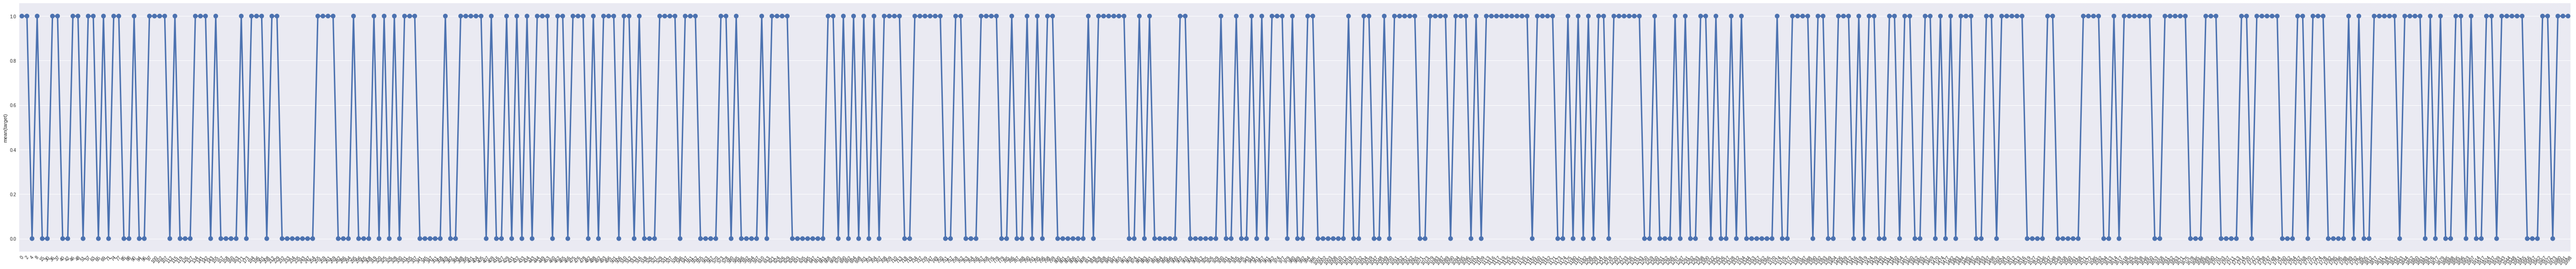

In [85]:
plt.figure(figsize=(100,10))
sns.pointplot(x = df_4.index, y = "target", data = df_4)
plt.xticks(rotation=50)
plt.show()

### Train Test Split df_4, df_5, df_6 since UCI files have separate test data

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
seed = 42
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(df_4,
                                                    df_4['target'],
                                                    test_size = .3,
                                                    random_state = seed)

In [76]:
### Scale data(fit_transform(X_train, y_train), transform(test))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_4_train_scaled = scaler.fit_transform(X_4_train)
X_4_test_scaled = scaler.transform(X_4_test)

In [78]:
print(X_4_test_scaled.shape)

(150, 1002)


### Deskew

In [80]:
import scipy.stats as st

### Check Skew

In [81]:
for col in df_4.columns[]:
    original_col_skewtest = st.skewtest(df_4[col])
    scaled_col_skewtest = st.skewtest(df_4[col])
    print("{}\norig skew test: {} \nscaled skew test: {}\n\n".format(col, 
                                                                     original_col_skewtest,
                                                                     scaled_col_skewtest))

_id
orig skew test: SkewtestResult(statistic=0.079901673323055367, pvalue=0.93631545896749879) 
scaled skew test: SkewtestResult(statistic=0.079901673323055367, pvalue=0.93631545896749879)


feat_000
orig skew test: SkewtestResult(statistic=1.6765257169771903, pvalue=0.093635263234842711) 
scaled skew test: SkewtestResult(statistic=1.6765257169771903, pvalue=0.093635263234842711)


feat_001
orig skew test: SkewtestResult(statistic=-0.31739219064969387, pvalue=0.75094603209271649) 
scaled skew test: SkewtestResult(statistic=-0.31739219064969387, pvalue=0.75094603209271649)


feat_002
orig skew test: SkewtestResult(statistic=-0.93836632725617708, pvalue=0.34805618438335184) 
scaled skew test: SkewtestResult(statistic=-0.93836632725617708, pvalue=0.34805618438335184)


feat_003
orig skew test: SkewtestResult(statistic=0.49777787386876865, pvalue=0.61864061283216354) 
scaled skew test: SkewtestResult(statistic=0.49777787386876865, pvalue=0.61864061283216354)


feat_004
orig skew test: Skew


feat_159
orig skew test: SkewtestResult(statistic=-0.35828675356114825, pvalue=0.7201287301470769) 
scaled skew test: SkewtestResult(statistic=-0.35828675356114825, pvalue=0.7201287301470769)


feat_160
orig skew test: SkewtestResult(statistic=0.45407038546408579, pvalue=0.64977816756486662) 
scaled skew test: SkewtestResult(statistic=0.45407038546408579, pvalue=0.64977816756486662)


feat_161
orig skew test: SkewtestResult(statistic=-0.091378964356751094, pvalue=0.92719147582142358) 
scaled skew test: SkewtestResult(statistic=-0.091378964356751094, pvalue=0.92719147582142358)


feat_162
orig skew test: SkewtestResult(statistic=0.42632909098903682, pvalue=0.66986806289900613) 
scaled skew test: SkewtestResult(statistic=0.42632909098903682, pvalue=0.66986806289900613)


feat_163
orig skew test: SkewtestResult(statistic=1.1847257743161697, pvalue=0.23612588831988901) 
scaled skew test: SkewtestResult(statistic=1.1847257743161697, pvalue=0.23612588831988901)


feat_164
orig skew test: Sk


feat_314
orig skew test: SkewtestResult(statistic=-1.0560400793055384, pvalue=0.29094990427195189) 
scaled skew test: SkewtestResult(statistic=-1.0560400793055384, pvalue=0.29094990427195189)


feat_315
orig skew test: SkewtestResult(statistic=2.6453866774764498, pvalue=0.0081597613236400537) 
scaled skew test: SkewtestResult(statistic=2.6453866774764498, pvalue=0.0081597613236400537)


feat_316
orig skew test: SkewtestResult(statistic=-0.27360042331189832, pvalue=0.78439170865001184) 
scaled skew test: SkewtestResult(statistic=-0.27360042331189832, pvalue=0.78439170865001184)


feat_317
orig skew test: SkewtestResult(statistic=0.43974150296966363, pvalue=0.6601243395500449) 
scaled skew test: SkewtestResult(statistic=0.43974150296966363, pvalue=0.6601243395500449)


feat_318
orig skew test: SkewtestResult(statistic=-1.5137495955826978, pvalue=0.13008936092977377) 
scaled skew test: SkewtestResult(statistic=-1.5137495955826978, pvalue=0.13008936092977377)


feat_319
orig skew test: Sk


feat_474
orig skew test: SkewtestResult(statistic=-1.7878271714768121, pvalue=0.073803895676412781) 
scaled skew test: SkewtestResult(statistic=-1.7878271714768121, pvalue=0.073803895676412781)


feat_475
orig skew test: SkewtestResult(statistic=-0.064970727489001318, pvalue=0.94819730707535366) 
scaled skew test: SkewtestResult(statistic=-0.064970727489001318, pvalue=0.94819730707535366)


feat_476
orig skew test: SkewtestResult(statistic=0.29891864605451363, pvalue=0.76500211970383947) 
scaled skew test: SkewtestResult(statistic=0.29891864605451363, pvalue=0.76500211970383947)


feat_477
orig skew test: SkewtestResult(statistic=-0.29084055971598466, pvalue=0.77117326336983993) 
scaled skew test: SkewtestResult(statistic=-0.29084055971598466, pvalue=0.77117326336983993)


feat_478
orig skew test: SkewtestResult(statistic=-1.2806505181710091, pvalue=0.20031644725108355) 
scaled skew test: SkewtestResult(statistic=-1.2806505181710091, pvalue=0.20031644725108355)


feat_479
orig skew te


feat_636
orig skew test: SkewtestResult(statistic=-0.89097466254058066, pvalue=0.37294276334825882) 
scaled skew test: SkewtestResult(statistic=-0.89097466254058066, pvalue=0.37294276334825882)


feat_637
orig skew test: SkewtestResult(statistic=2.4988677250919156, pvalue=0.012459080585999593) 
scaled skew test: SkewtestResult(statistic=2.4988677250919156, pvalue=0.012459080585999593)


feat_638
orig skew test: SkewtestResult(statistic=-0.39022362918831133, pvalue=0.69637119033654948) 
scaled skew test: SkewtestResult(statistic=-0.39022362918831133, pvalue=0.69637119033654948)


feat_639
orig skew test: SkewtestResult(statistic=0.65021081793605329, pvalue=0.51555605421003869) 
scaled skew test: SkewtestResult(statistic=0.65021081793605329, pvalue=0.51555605421003869)


feat_640
orig skew test: SkewtestResult(statistic=-0.3334554239028712, pvalue=0.73879053237242953) 
scaled skew test: SkewtestResult(statistic=-0.3334554239028712, pvalue=0.73879053237242953)


feat_641
orig skew test: 


feat_798
orig skew test: SkewtestResult(statistic=-0.13174761114003636, pvalue=0.89518392546885173) 
scaled skew test: SkewtestResult(statistic=-0.13174761114003636, pvalue=0.89518392546885173)


feat_799
orig skew test: SkewtestResult(statistic=-0.74597388998161462, pvalue=0.45568318772006633) 
scaled skew test: SkewtestResult(statistic=-0.74597388998161462, pvalue=0.45568318772006633)


feat_800
orig skew test: SkewtestResult(statistic=1.0955173732025667, pvalue=0.27329003852534817) 
scaled skew test: SkewtestResult(statistic=1.0955173732025667, pvalue=0.27329003852534817)


feat_801
orig skew test: SkewtestResult(statistic=-1.3281984885952578, pvalue=0.18411254358834439) 
scaled skew test: SkewtestResult(statistic=-1.3281984885952578, pvalue=0.18411254358834439)


feat_802
orig skew test: SkewtestResult(statistic=-1.6459093221626586, pvalue=0.099782429393580771) 
scaled skew test: SkewtestResult(statistic=-1.6459093221626586, pvalue=0.099782429393580771)


feat_803
orig skew test: 


feat_959
orig skew test: SkewtestResult(statistic=-1.0543101797902226, pvalue=0.29174092959930031) 
scaled skew test: SkewtestResult(statistic=-1.0543101797902226, pvalue=0.29174092959930031)


feat_960
orig skew test: SkewtestResult(statistic=0.33316431102123573, pvalue=0.73901025632813333) 
scaled skew test: SkewtestResult(statistic=0.33316431102123573, pvalue=0.73901025632813333)


feat_961
orig skew test: SkewtestResult(statistic=0.06945536050020075, pvalue=0.94462716396170132) 
scaled skew test: SkewtestResult(statistic=0.06945536050020075, pvalue=0.94462716396170132)


feat_962
orig skew test: SkewtestResult(statistic=0.60050086984693185, pvalue=0.54817248135514252) 
scaled skew test: SkewtestResult(statistic=0.60050086984693185, pvalue=0.54817248135514252)


feat_963
orig skew test: SkewtestResult(statistic=-0.5345628350014815, pvalue=0.59295218868091359) 
scaled skew test: SkewtestResult(statistic=-0.5345628350014815, pvalue=0.59295218868091359)


feat_964
orig skew test: Skew

In [ ]:
### apply model to predict